MyCircle example from [ipython-in-depth](https://github.com/ipython/ipython-in-depth)


In [1]:
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        return "alert('I am a circle!');"

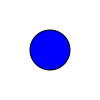

In [2]:
mc=MyCircle(30)
mc

The javascript representation (which is the default in jupyter) 
opens a pop-up like this one:
![](old_js_repr.png)
I would like it to show a javascript figure of a circle instead.

A circle can be made like this, but defining html and javascript and using two consecutive display functions.

In [3]:
from IPython.display import display_html, display_javascript
t='''<html>
        <head></head>
        <body>
            <canvas id='circle'/>
        </body>
     </html>'''

js='''var c = document.getElementById("circle");
var ctx = c.getContext("2d");
ctx.beginPath();
ctx.arc(100, 75, 20, 0, 2 * Math.PI);
ctx.stroke();'''
display_html(t, raw=True)
display_javascript(js, raw=True)

I crudely modified the class to return a circle also for javascript 

In [6]:
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        from IPython.display import display_html
        t='''<html>
                <head></head>
                <body>
                    <canvas id='mycircle'/>
                </body>
             </html>'''
        display_html(t, raw=True)
        
        js='''var c = document.getElementById("mycircle");
        var ctx = c.getContext("2d");
        ctx.beginPath();
        ctx.arc(100, 75, {}, 0, 2 * Math.PI);
        ctx.stroke();'''.format(self.radius)

        return js

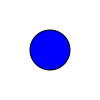

In [5]:
mc=MyCircle(radius=50)
mc

Inspiration for the modified code came from [http://www.w3schools.com/](http://www.w3schools.com/tags/canvas_arc.asp) for the circle drawing javascript and from the Github repo [Who8MyLunch/ipynb_widget_canvas](https://github.com/Who8MyLunch/ipynb_widget_canvas) for how to get the javascript to display.

I would eventually like to create a javascript representation consisting of box and lines as below. The underlying object would perhaps be a biopython SeqRecord like object. 

![figure](assembly_figure_mock_up.png)

Clicking on one of the boxes would give access to the underlying sequence in a small text window in a simila manner as for [AngularPlasmid](http://angularplasmid.vixis.com/)

![ap](angularplasmidscreenshot.png)